In [75]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# 1. Summary Statistics 

In [76]:
# Load and display the dataset
df = pd.read_csv('p2.csv')
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())

Dataset shape: (118, 10)

First 5 rows:
   id first_name last_name       telephone                           address  \
0   1      Kaiya      Snow  (716) 201-1212  6231 Tonawanda Creek Rd #APT 308   
1   2       Dean       Roy  (716) 201-1588                    6884 E High St   
2   3       Eden      Paul  (716) 202-4596   4647 Southwestern Blvd #APT 350   
3   4    Bryanna   Higgins  (716) 203-7041                      418 Park Ave   
4   5  Elisabeth       Lee  (716) 203-7043                  36 E Courtney St   

       city state    zip  latitude  longitude  
0  Lockport    NY  14094  43.08926  -78.69313  
1  Lockport    NY  14094  43.16245  -78.65036  
2   Hamburg    NY  14075  42.76003  -78.83194  
3   Dunkirk    NY  14048  42.48279  -79.33088  
4   Dunkirk    NY  14048  42.48299  -79.31928  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      -------------

# 2. Plots - pair,histograms,box

<Figure size 1200x1000 with 0 Axes>

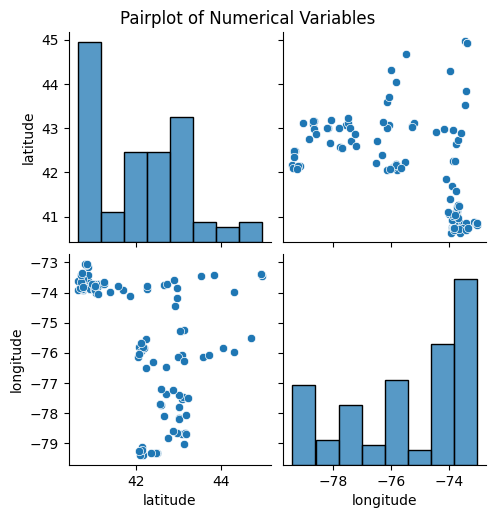

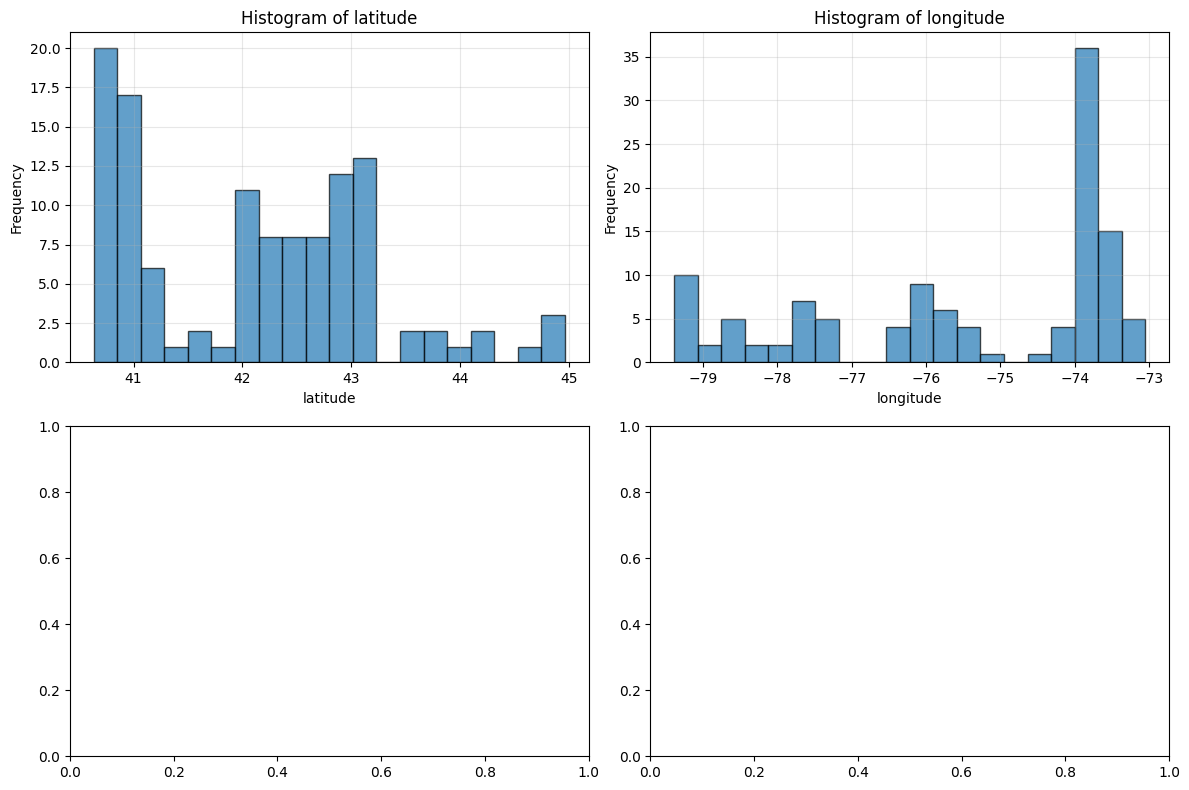

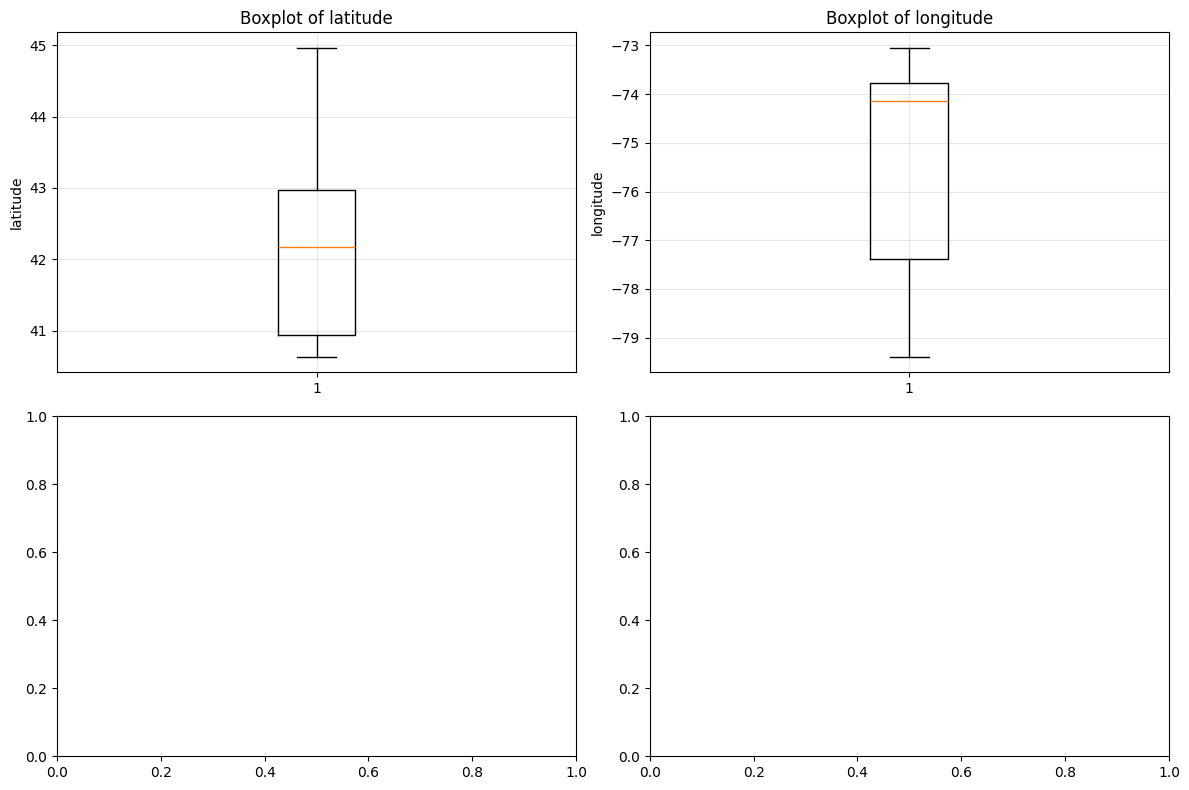

In [77]:
numerical_cols = ['latitude','longitude']

# Create pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df[numerical_cols], diag_kind='hist')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Create histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [78]:
# Prepare data for clustering (use only numerical columns)
numerical_cols = df.select_dtypes(include=[np.number]).columns
X = df[numerical_cols]
print("Numerical columns used for clustering:", list(numerical_cols))

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data standardized for clustering")

Numerical columns used for clustering: ['id', 'zip', 'latitude', 'longitude']
Data standardized for clustering


# 3. Kmeans

In [79]:
# Perform K-means clustering with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
clusters_5 = kmeans_5.fit_predict(X_scaled)

print("K-means clustering with 5 clusters completed")
print("\nCluster distribution:")
unique, counts = np.unique(clusters_5, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} samples")

K-means clustering with 5 clusters completed

Cluster distribution:
Cluster 0: 20 samples
Cluster 1: 33 samples
Cluster 2: 33 samples
Cluster 3: 16 samples
Cluster 4: 16 samples


# 4. Find Optimal Number of Clusters

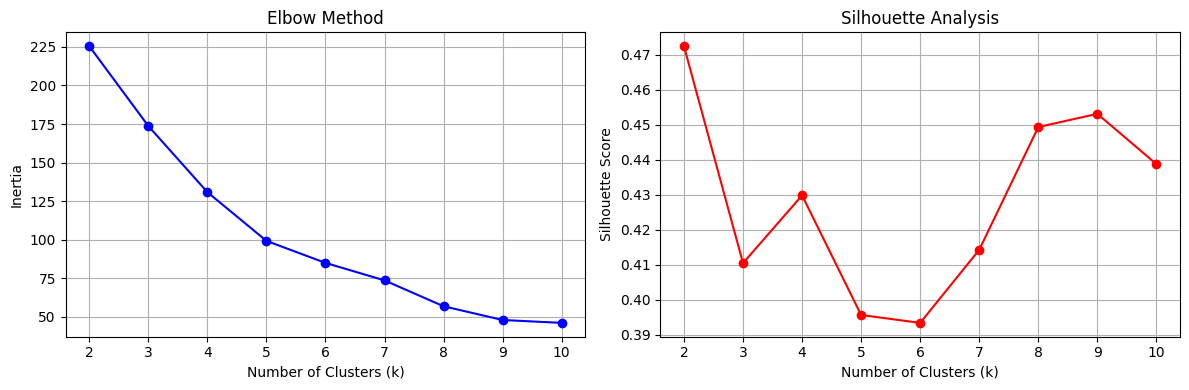

Optimal number of clusters: 2
Best Silhouette Score: 0.472


In [80]:
# Elbow method and Silhouette analysis
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, clusters))

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(True)

ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
ax2.grid(True)

plt.tight_layout()
plt.show()

optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")
print(f"Best Silhouette Score: {max(silhouette_scores):.3f}")

# 5. K-means Accuracy Evaluation

In [81]:
# Evaluate K-means with 5 clusters
silhouette_5 = silhouette_score(X_scaled, clusters_5)
inertia_5 = kmeans_5.inertia_

print(f"K-means with 5 clusters evaluation:")
print(f"Silhouette Score: {silhouette_5:.3f}")
print(f"Inertia: {inertia_5:.2f}")

K-means with 5 clusters evaluation:
Silhouette Score: 0.396
Inertia: 99.20


# 6. Visualization of K-means Results

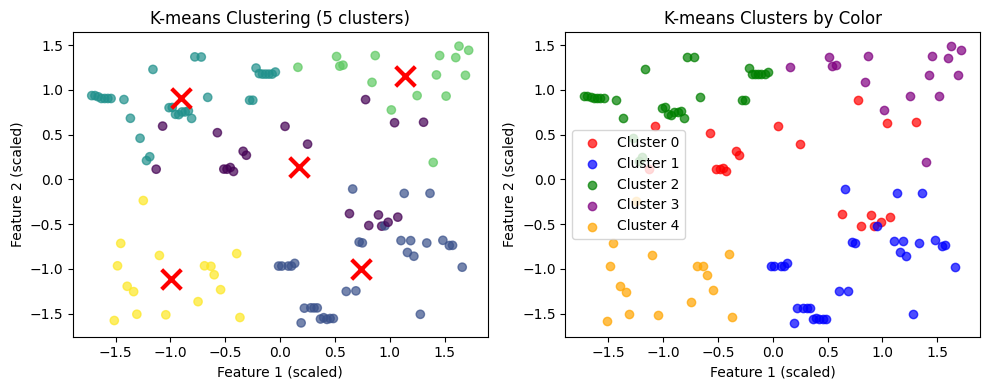

In [82]:
# Visualize clustering results using first two principal features
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_5, cmap='viridis', alpha=0.7)
plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], 
            c='red', marker='x', s=200, linewidths=3)
plt.title('K-means Clustering (5 clusters)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')

plt.subplot(1, 2, 2)
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(5):
    cluster_points = X_scaled[clusters_5 == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=colors[i], label=f'Cluster {i}', alpha=0.7)
plt.title('K-means Clusters by Color')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()

plt.tight_layout()
plt.show()

# 7. Sample Dataset for Agglomerative Clustering

Sample dataset created:
Points: [(15, 13), (19, 16), (15, 17), (5, 6), (13, 17), (17, 14), (15, 15), (12, 13), (8, 7), (6, 6), (9, 10), (13, 12)]


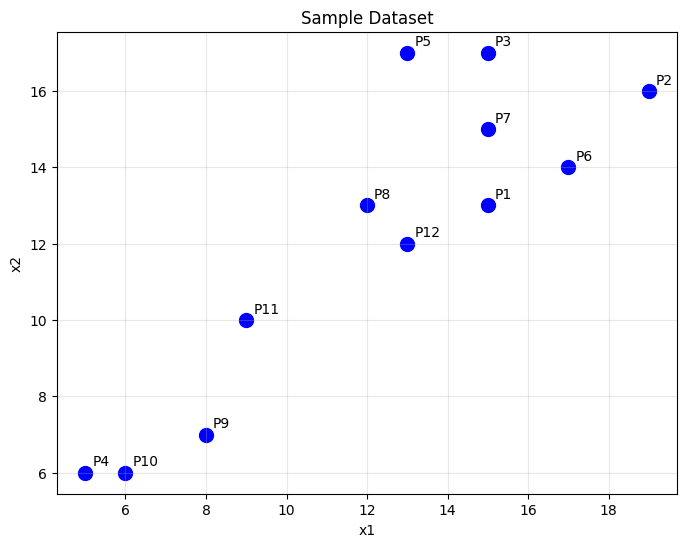

In [83]:
# Create sample dataset
x1 = [15, 19, 15, 5, 13, 17, 15, 12, 8, 6, 9, 13]
x2 = [13, 16, 17, 6, 17, 14, 15, 13, 7, 6, 10, 12]
sample_data = np.column_stack((x1, x2))

print("Sample dataset created:")
print("Points:", [(x1[i], x2[i]) for i in range(len(x1))])

# Visualize sample data
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c='blue', s=100)
for i, (x, y) in enumerate(zip(x1, x2)):
    plt.annotate(f'P{i+1}', (x, y), xytext=(5, 5), textcoords='offset points')
plt.title('Sample Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True, alpha=0.3)
plt.show()

# 8. Agglomerative Clustering with Different Linkage Methods

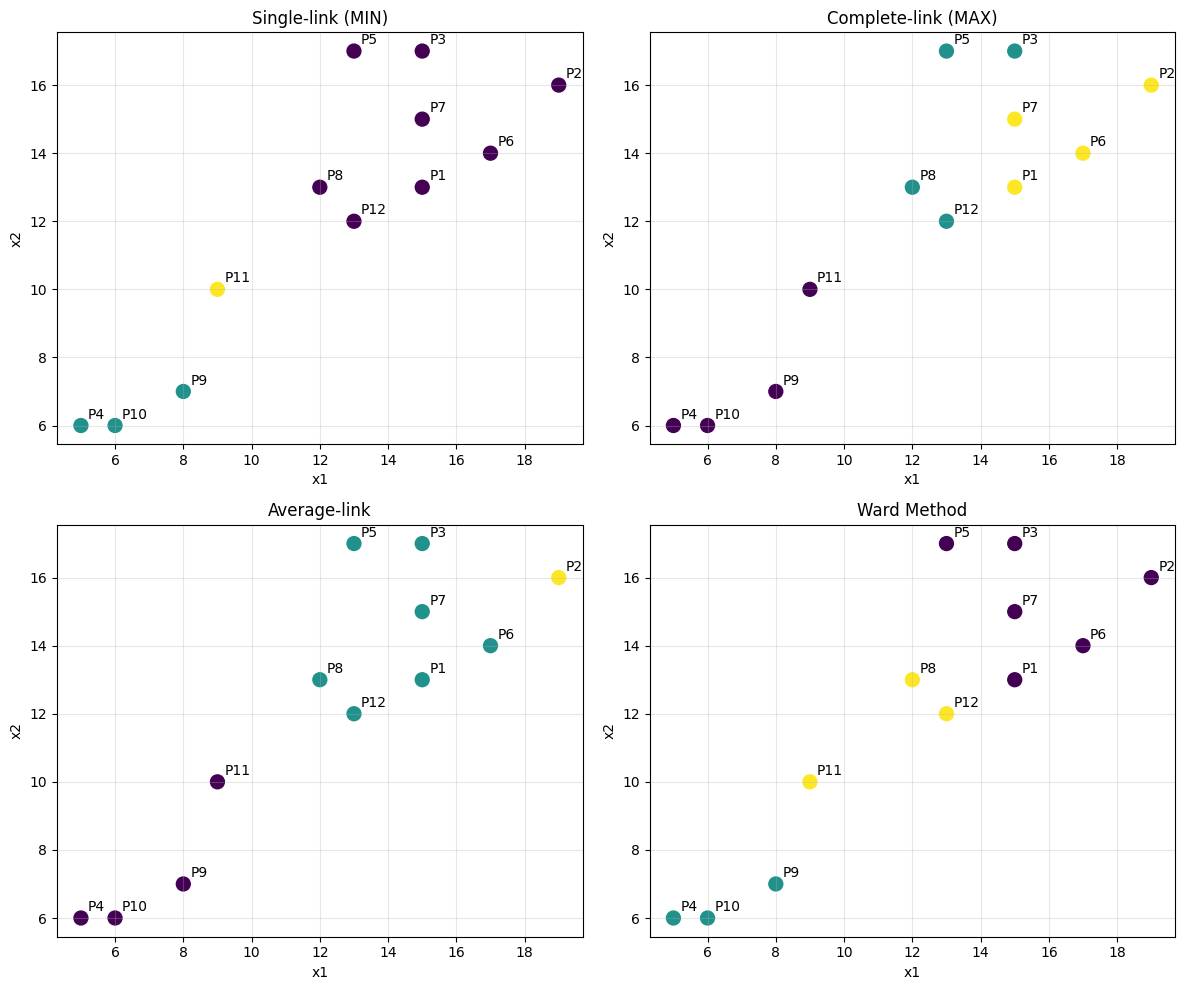

Single-link (MIN): [0 0 0 1 0 0 0 0 1 1 2 0]
Complete-link (MAX): [2 2 1 0 1 2 2 1 0 0 0 1]
Average-link: [1 2 1 0 1 1 1 1 0 0 0 1]
Ward Method: [0 0 0 1 0 0 0 2 1 1 2 2]


In [84]:
# Apply different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
linkage_names = ['Single-link (MIN)', 'Complete-link (MAX)', 'Average-link', 'Ward Method']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

results = {}

for i, (method, name) in enumerate(zip(linkage_methods, linkage_names)):
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = agg_clustering.fit_predict(sample_data)
    results[method] = labels
    
    # Plot results
    axes[i].scatter(x1, x2, c=labels, cmap='viridis', s=100)
    for j, (x, y) in enumerate(zip(x1, x2)):
        axes[i].annotate(f'P{j+1}', (x, y), xytext=(5, 5), textcoords='offset points')
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('x1')
    axes[i].set_ylabel('x2')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print results
for method, name in zip(linkage_methods, linkage_names):
    print(f"{name}: {results[method]}")

# 9. Dendrograms for Hierarchical Clustering

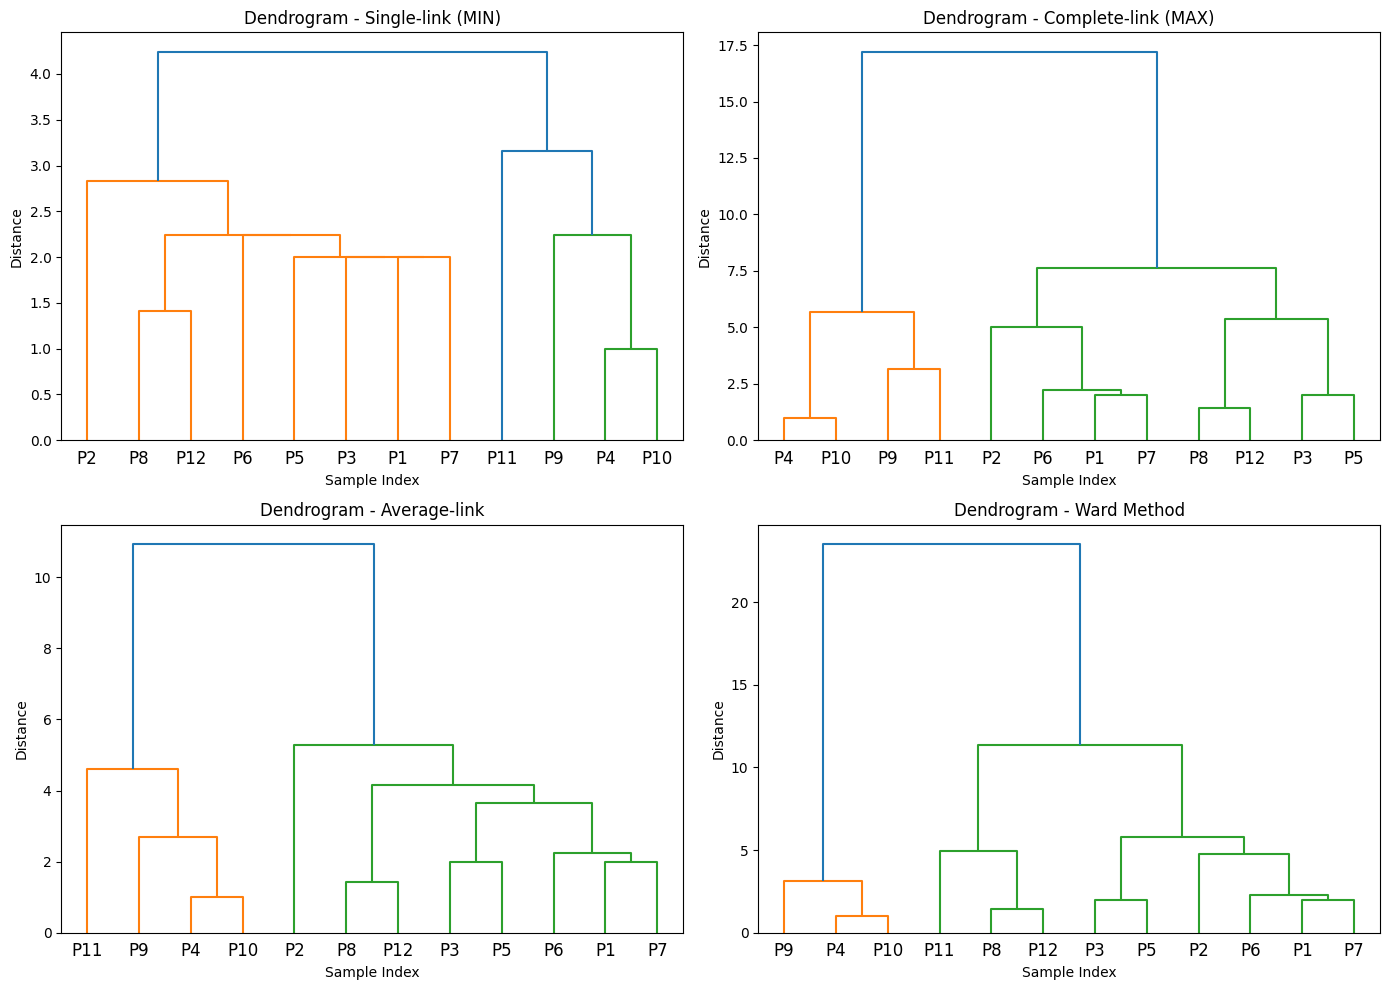

In [85]:
# Create dendrograms for each linkage method
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, (method, name) in enumerate(zip(linkage_methods, linkage_names)):
    Z = linkage(sample_data, method=method)
    dendrogram(Z, ax=axes[i], labels=[f'P{j+1}' for j in range(len(sample_data))])
    axes[i].set_title(f'Dendrogram - {name}')
    axes[i].set_xlabel('Sample Index')
    axes[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

# 10. Performance Comparison

In [86]:
# Compare performance of different methods
sample_scaled = StandardScaler().fit_transform(sample_data)

print("Performance Comparison:")
print("-" * 50)

# Agglomerative clustering performance
for method, name in zip(linkage_methods, linkage_names):
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = agg_clustering.fit_predict(sample_scaled)
    silhouette_avg = silhouette_score(sample_scaled, labels)
    print(f"{name:20}: Silhouette Score = {silhouette_avg:.3f}")

# K-means performance on sample data
kmeans_sample = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_sample.fit_predict(sample_scaled)
kmeans_silhouette = silhouette_score(sample_scaled, kmeans_labels)
print(f"{'K-means':20}: Silhouette Score = {kmeans_silhouette:.3f}")

print(f"\nOriginal dataset K-means (5 clusters): Silhouette Score = {silhouette_5:.3f}")

Performance Comparison:
--------------------------------------------------
Single-link (MIN)   : Silhouette Score = 0.410
Complete-link (MAX) : Silhouette Score = 0.444
Average-link        : Silhouette Score = 0.367
Ward Method         : Silhouette Score = 0.444
K-means             : Silhouette Score = 0.370

Original dataset K-means (5 clusters): Silhouette Score = 0.396
